## Müşteriye kredi verilip verilmeyeceğini tahmin etme

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#pembe uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("LoansTrainingSet.csv")

In [11]:
#EDA

In [12]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [13]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [14]:
df.isnull().sum()

#Boş verileri görmek için

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [15]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [16]:
df.isnull().sum().sort_values(ascending=False)

#Boş verielrin büyükten küçüğe doğru sıralama

Months since last delinquent    140383
Credit Score                     61676
Annual Income                    61676
Years in current job             11476
Bankruptcies                       529
Tax Liens                           23
Years of Credit History              0
Maximum Open Credit                  0
Current Credit Balance               0
Number of Credit Problems            0
Number of Open Accounts              0
Loan ID                              0
Monthly Debt                         0
Customer ID                          0
Home Ownership                       0
Term                                 0
Current Loan Amount                  0
Loan Status                          0
Purpose                              0
dtype: int64

In [17]:
df.info()
#Verilerin cinsini gösteren kod

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [18]:
import seaborn as sns
# tek satırlık kodlarla grafik oluşturan paket

<Axes: >

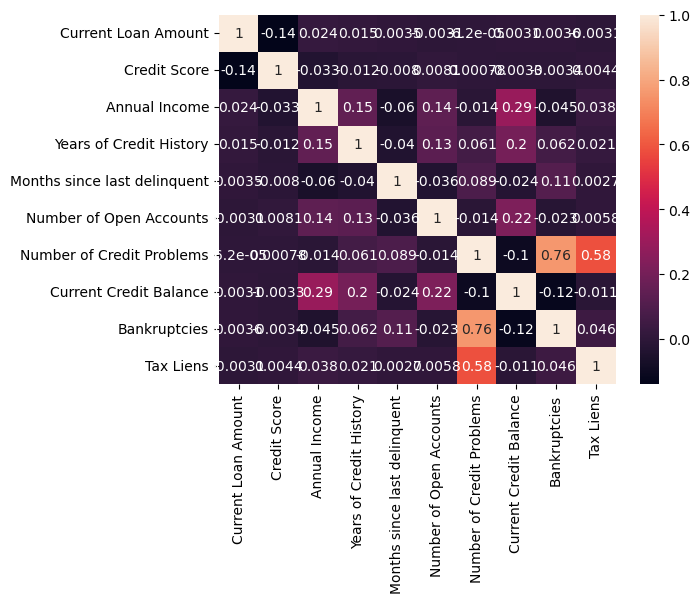

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Coralasyon grafiği

In [20]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [21]:
df.shape

(256984, 19)

In [22]:
boslar=df.isnull().mean()
sutunkaldır=boslar[boslar>0.4].index
#%40 ın üzeründe değeri eksik olan sutunları kaldır

In [23]:
df=df.drop(sutunkaldır,axis=1)

In [24]:
#Katkısı olmayacakları siliyoruz
df=df.drop('Loan ID', axis=1)
df=df.drop('Customer ID', axis=1)

In [25]:
#Verileri düzenleyip, temizliyoruz
df["Monthly Debt"]=df["Monthly Debt"].str.replace("$","")
df["Monthly Debt"]=df["Monthly Debt"].str.replace(",","", regex=True)
df["Monthly Debt"]=df["Monthly Debt"].astype("float")
df["Monthly Debt"].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

In [26]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,10,0,6760,16056,0.0,0.0
1,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,1106.04,26.3,17,0,6262,19149,0.0,0.0
2,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,5,0,20967,28335,0.0,0.0
3,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,751.92,26.2,9,0,22529,43915,0.0,0.0
4,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,355.18,11.5,12,0,17391,37081,0.0,0.0


In [27]:
df.isnull().sum().sort_values(ascending=False)

Credit Score                 61676
Annual Income                61676
Years in current job         11476
Bankruptcies                   529
Tax Liens                       23
Loan Status                      0
Current Loan Amount              0
Term                             0
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
dtype: int64

In [28]:
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].median())  #Orta değer ile boş verileri doldurduk

In [29]:
df['Annual Income']=df['Annual Income'].fillna(df['Annual Income'].median()) #Orta değer ile boş verileri doldurduk

In [30]:
df['Tax Liens']=df['Tax Liens'].fillna(df['Tax Liens'].median()) #Orta değer ile boş verileri doldurduk

In [31]:
df['Bankruptcies']=df['Bankruptcies'].fillna(df['Bankruptcies'].median()) #Orta değer ile boş verileri doldurduk

In [32]:
df['Years in current job'] = df['Years in current job'].str.extract(r'(\d+(\.\d+)?)')[0]
#Sayısal değerleri eşleştirmek ve çıkarmak için düzenli bir ifade modeli kullandık

In [33]:
df.isnull().sum().sort_values(ascending=False)

Years in current job         11476
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                     0
Home Ownership                   0
Annual Income                    0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [34]:
df.select_dtypes("object_")

#Sözel verileri görmemizi sağlar

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Maximum Open Credit
0,Fully Paid,Short Term,10,Home Mortgage,Debt Consolidation,16056
1,Fully Paid,Short Term,4,Home Mortgage,other,19149
2,Fully Paid,Short Term,10,Home Mortgage,Debt Consolidation,28335
3,Fully Paid,Short Term,10,Own Home,Debt Consolidation,43915
4,Fully Paid,Short Term,4,Rent,Debt Consolidation,37081
...,...,...,...,...,...,...
256979,Fully Paid,Short Term,2,Rent,Debt Consolidation,44080
256980,Fully Paid,Short Term,10,Own Home,Debt Consolidation,9758
256981,Charged Off,Short Term,9,Home Mortgage,Debt Consolidation,20090
256982,Charged Off,Short Term,9,Home Mortgage,Debt Consolidation,20090


In [35]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('#VALUE!', float('nan'))
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float)

# Nan olanlara sayısal bir değer vermek için kullanıldı

In [36]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520,Short Term,741.0,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,10,0,6760,16056.0,0.0,0.0
1,Fully Paid,3441,Short Term,734.0,4,Home Mortgage,42269.0,other,1106.04,26.3,17,0,6262,19149.0,0.0,0.0
2,Fully Paid,21029,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,5,0,20967,28335.0,0.0,0.0
3,Fully Paid,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,9,0,22529,43915.0,0.0,0.0
4,Fully Paid,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,355.18,11.5,12,0,17391,37081.0,0.0,0.0


In [37]:
y=df['Loan Status']
x=df.drop('Loan Status',axis=1)

#y yi 'Loan Status' e eşitledik
#x i 'Loan Status' i sildikten sonra yeni gelek olan verilere eşitledik

In [38]:
x=pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)



In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)
#internetten alınmiştır
#Atama, bir veri kümesindeki eksik değerlerin bazı anlamlı değerlerle doldurulması işlemidir. Bu durumda, eksik değerleri eksik olmayan değerlerin ortalamasıyla değiştiren ortalama stratejisini kullanıyorsunuz.


In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier



gb=GradientBoostingClassifier()
d=DecisionTreeClassifier()
g=GaussianNB()
b=BernoulliNB()
lr=LogisticRegression()
r=RandomForestClassifier()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [44]:
g.fit(x_train,y_train)

GaussianNB()

In [45]:
tahmin1=g.predict(x_test)

In [46]:
accuracy_score(tahmin1,y_test)

0.4498317022394303

In [47]:
lr.fit(x_train,y_train)

LogisticRegression()

In [48]:
tahmin2=lr.predict(x_test)

In [49]:
accuracy_score(tahmin2,y_test)

0.7422612214720704

In [50]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
tahmin3=lr.predict(x_test)

In [52]:
accuracy_score(tahmin3,y_test)

0.7422612214720704

In [53]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
tahmin4=r.predict(x_test)

In [55]:
accuracy_score(tahmin4,y_test)

0.847559196062027

In [56]:
b.fit(x_train,y_train)

BernoulliNB()

In [57]:
tahmin5=b.predict(x_test)

In [58]:
accuracy_score(tahmin5,y_test)

0.6917913496896706

In [59]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [60]:
tahmin6=gb.predict(x_test)

In [61]:
accuracy_score(tahmin6,y_test)

0.7625931474599685

In [62]:
 from sklearn.neighbors import KNeighborsClassifier

In [63]:
k=KNeighborsClassifier()

In [64]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
tahmin7=k.predict(x_test)

In [66]:
accuracy_score(tahmin7,y_test)

0.7195361596980369